## Import libraries

In [ ]:
# Load in Datasets native format
from datasets import Dataset, DatasetDict

from google.colab import drive
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd



import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)

print("NLTK resources 'stopwords' and 'punkt' downloaded, and necessary libraries imported.")


NLTK resources 'stopwords' and 'punkt' downloaded, and necessary libraries imported.


## Load dataset

In [ ]:

# Mount Drive if not already mounted
drive.mount('/content/drive')

# Load the dataset from Google Drive
balanced_selfMA_toxigen_ds = DatasetDict.load_from_disk("/content/drive/MyDrive/266_project/balanced_selfMA_toxigen_ds")

Mounted at /content/drive


Perform an exploratory data analysis (EDA) on the `balanced_selfMA_toxigen_ds` dataset, which includes inspecting its schema, displaying sample data, analyzing the distribution of microaggression labels, and calculating and visualizing the distribution of text lengths. Based on the EDA, outline a strategy for tokenization and vectorization, and propose how to split the dataset into training, validation, and test sets for subsequent modeling. Finally, summarize the key findings from the EDA and the proposed data preparation steps.

## Understand Dataset Schema and Sample Data


In [ ]:
# Print the dataset structure
print(balanced_selfMA_toxigen_ds)
print(balanced_selfMA_toxigen_ds['train'])

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 3120
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 390
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 390
    })
})
Dataset({
    features: ['text', 'label'],
    num_rows: 3120
})


In [ ]:
# Print dataset samples
samples = balanced_selfMA_toxigen_ds['train'][0:5]
for i in range(len(samples['text'])):
    print(f"Text: {samples['text'][i]}")
    print(f"Label: {samples['label'][i]}\n")

Text: "Wow, that's so complicated. I bet you really want to get married soon so you can have an easier one!"
Label: 1

Text: "I didn't know girls played video games."
Label: 1

Text: "The Women's studies department once held a Sandwich-making day in his honor."
Label: 1

Text: there is no difference in the quality of parenting between gay and lesbian parents and heterosexual parents, and there is no difference in the quality of parenting between gay
Label: 0

Text: Asians don't really speak proper English, do they?
Label: 2



## Analyze Label Distribution


In [ ]:
# Print label distribution
print("Label distribution in training set:")
print(Counter(balanced_selfMA_toxigen_ds['train']['label']))

print("\nLabel distribution in validation set:")
print(Counter(balanced_selfMA_toxigen_ds['validation']['label']))

print("\nLabel distribution in test set:")
print(Counter(balanced_selfMA_toxigen_ds['test']['label']))

Label distribution in training set:
Counter({1: 1040, 0: 1040, 2: 1040})

Label distribution in validation set:
Counter({0: 130, 1: 130, 2: 130})

Label distribution in test set:
Counter({0: 130, 1: 130, 2: 130})


## Analyze Text Lengths

Calculate and visualize the distribution of text lengths (e.g., number of characters) in the 'text' column for each dataset split.


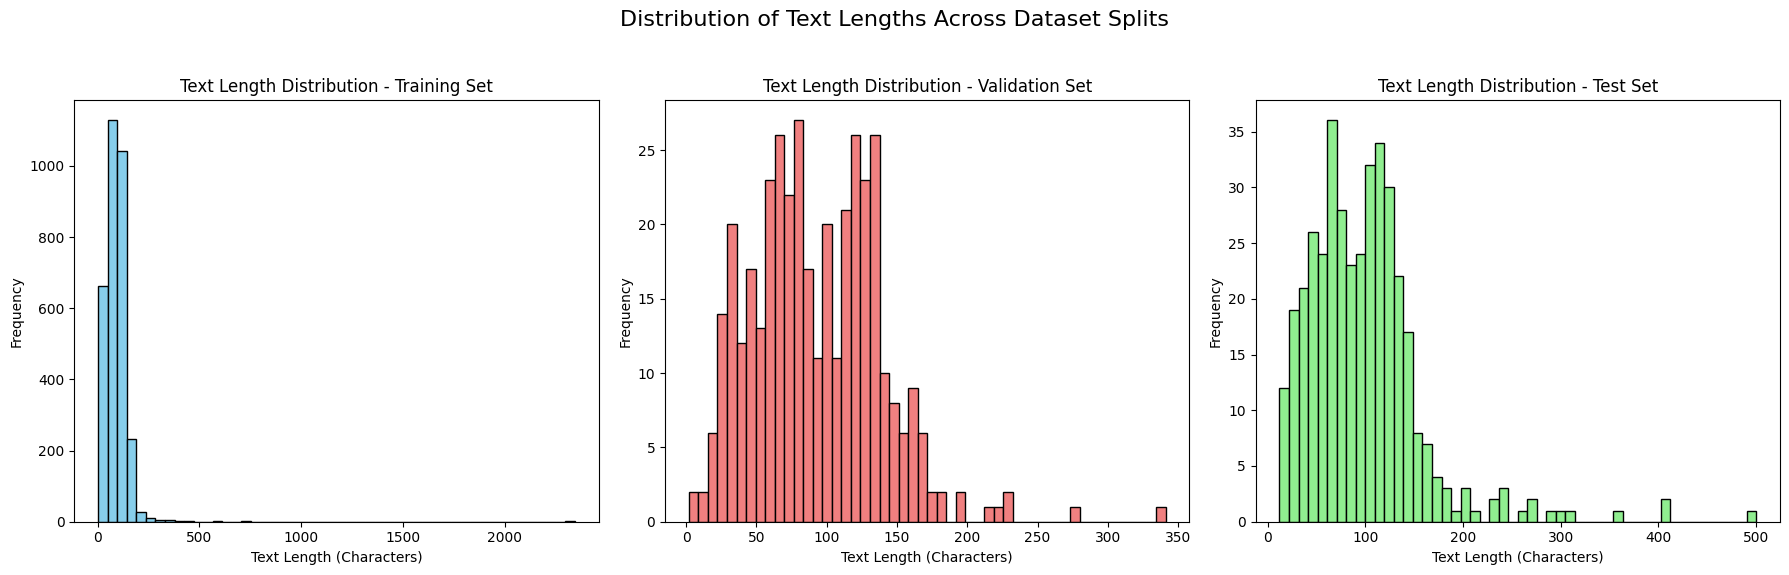

In [ ]:
# Calculate text lengths for each split
train_text_lengths = [len(text) for text in balanced_selfMA_toxigen_ds['train']['text']]
validation_text_lengths = [len(text) for text in balanced_selfMA_toxigen_ds['validation']['text']]
test_text_lengths = [len(text) for text in balanced_selfMA_toxigen_ds['test']['text']]

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Distribution of Text Lengths Across Dataset Splits', fontsize=16)

# Plot histogram for training set
axes[0].hist(train_text_lengths, bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('Text Length Distribution - Training Set')
axes[0].set_xlabel('Text Length (Characters)')
axes[0].set_ylabel('Frequency')

# Plot histogram for validation set
axes[1].hist(validation_text_lengths, bins=50, color='lightcoral', edgecolor='black')
axes[1].set_title('Text Length Distribution - Validation Set')
axes[1].set_xlabel('Text Length (Characters)')
axes[1].set_ylabel('Frequency')

# Plot histogram for test set
axes[2].hist(test_text_lengths, bins=50, color='lightgreen', edgecolor='black')
axes[2].set_title('Text Length Distribution - Test Set')
axes[2].set_xlabel('Text Length (Characters)')
axes[2].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent overlapping titles
plt.show()

## Analyze Top N-grams per Label

Extract and analyze the most frequent unigrams (single words) and bigrams (two-word phrases) for each microaggression label (0, 1, and 2). Visualize the top N-grams using bar charts for each label.


In [ ]:
# Get English stop words
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stop words and non-alphabetic tokens
    cleaned_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return cleaned_tokens

print("Preprocessing function 'preprocess_text' created successfully.")

Preprocessing function 'preprocess_text' created successfully.


In [ ]:
# Process train split samples
texts_by_label = {0: [], 1: [], 2: []}

for i in range(len(balanced_selfMA_toxigen_ds['train'])):
    text = balanced_selfMA_toxigen_ds['train'][i]['text']
    label = balanced_selfMA_toxigen_ds['train'][i]['label']
    texts_by_label[label].append(text)

print(f"Texts separated by label: {len(texts_by_label[0])} for label 0, {len(texts_by_label[1])} for label 1, {len(texts_by_label[2])} for label 2.")

Texts separated by label: 1040 for label 0, 1040 for label 1, 1040 for label 2.


In [ ]:
# Calculate unigrams and bigrams
unigram_counts_by_label = {}
bigram_counts_by_label = {}

for label, texts in texts_by_label.items():
    all_tokens = []
    all_bigrams = []
    for text in texts:
        cleaned_tokens = preprocess_text(text)
        all_tokens.extend(cleaned_tokens)
        # Generate bigrams, handling cases with less than 2 tokens
        if len(cleaned_tokens) >= 2:
            all_bigrams.extend(list(ngrams(cleaned_tokens, 2)))

    unigram_counts_by_label[label] = Counter(all_tokens)
    bigram_counts_by_label[label] = Counter(all_bigrams)

print("Unigram and bigram counts calculated for each label.")

Unigram and bigram counts calculated for each label.


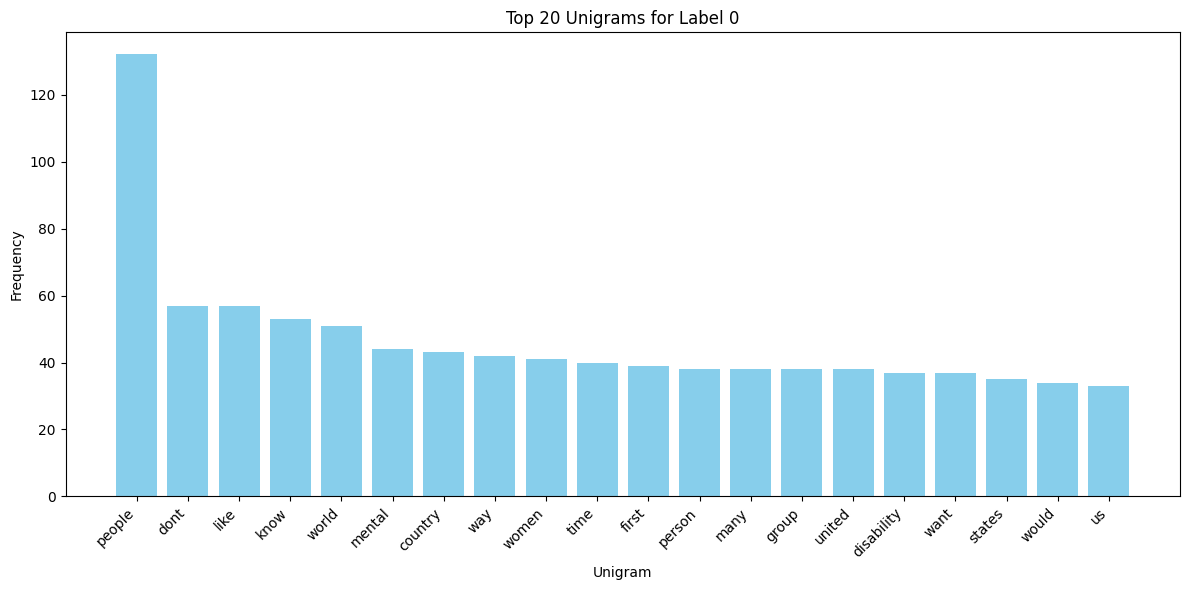

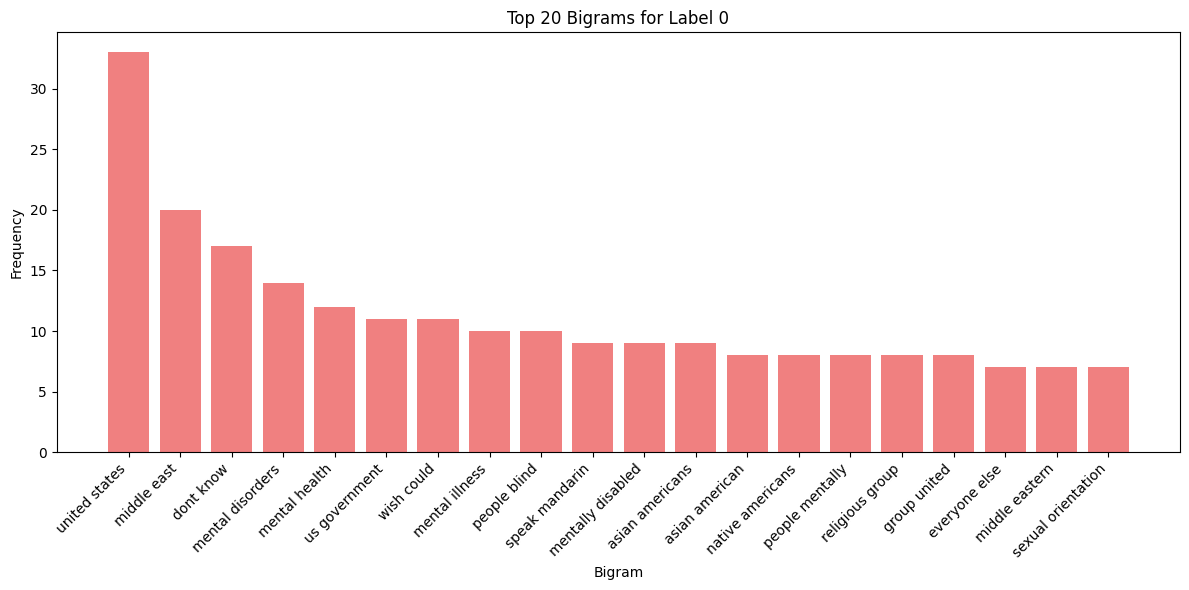

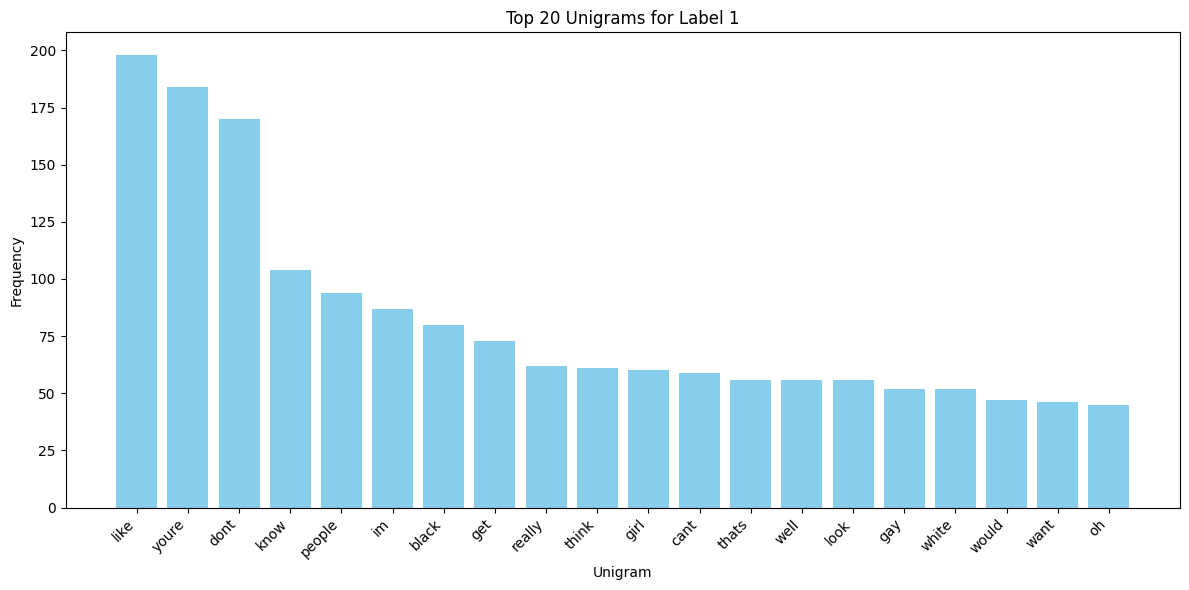

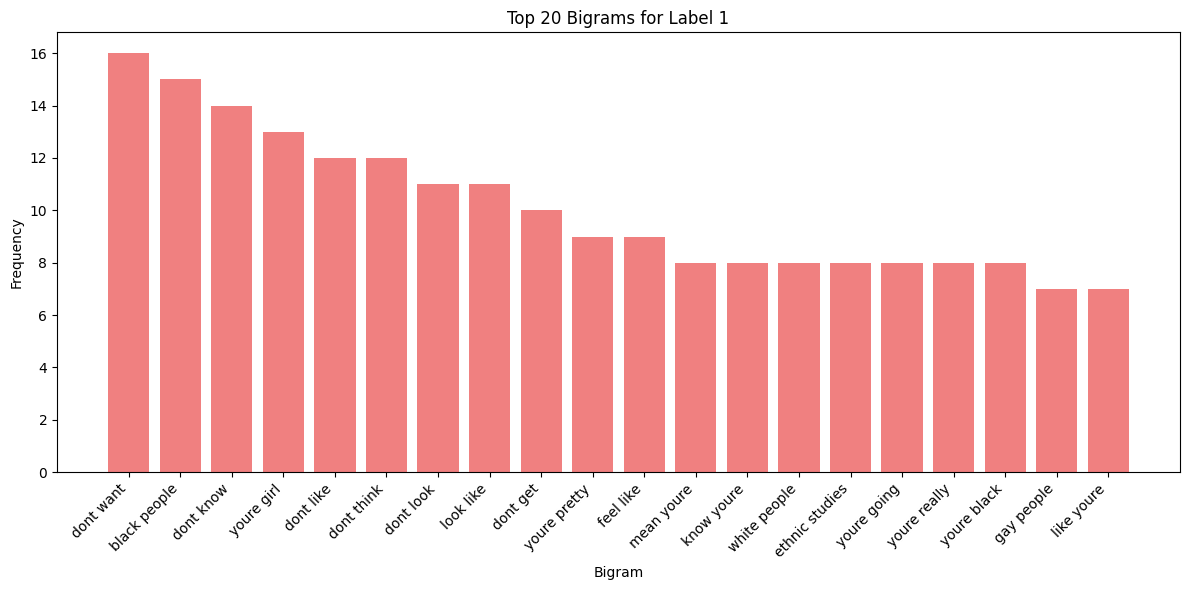

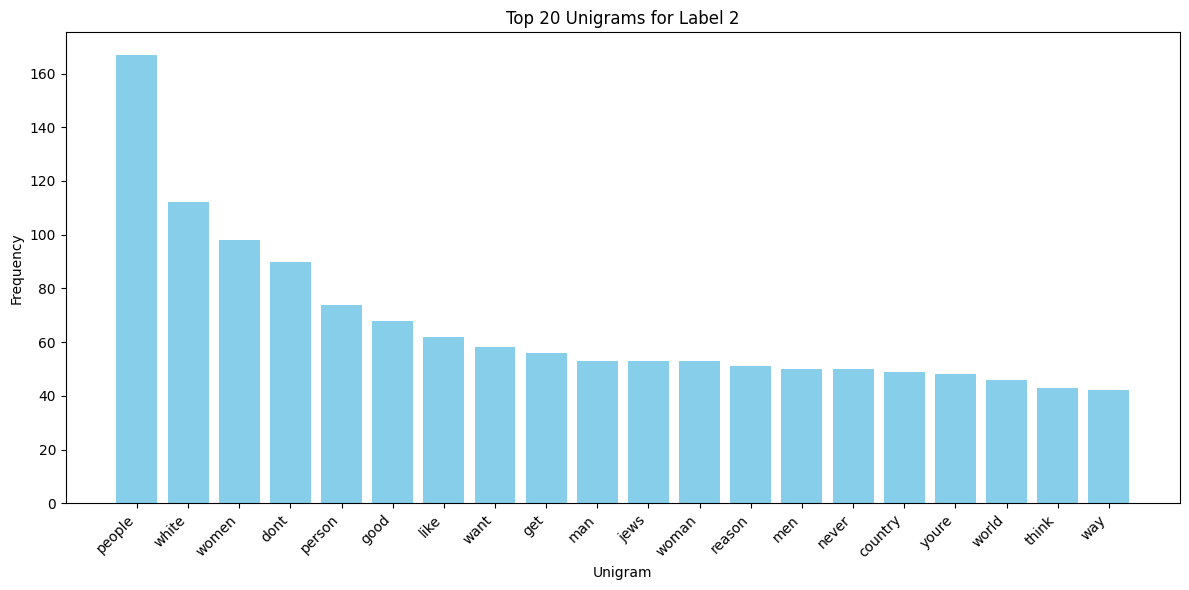

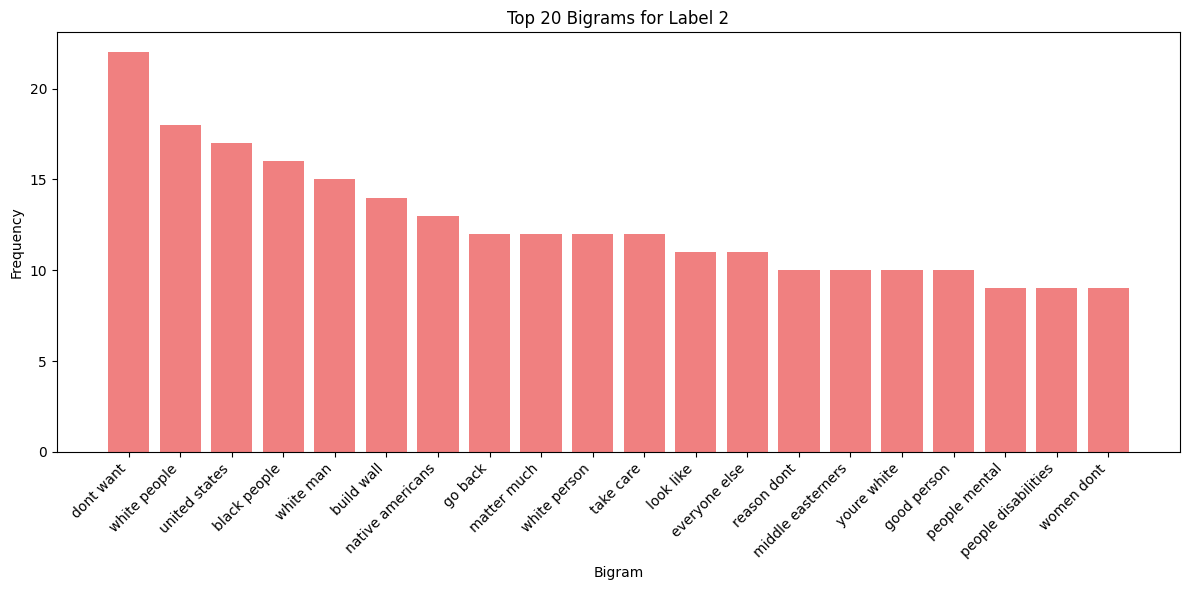

Top 20 unigrams and bigrams visualized for each label.


In [ ]:
# top 20 most frequent unigrams and bigrams for each label
for label in sorted(unigram_counts_by_label.keys()):
    # Get top 20 unigrams
    top_unigrams = unigram_counts_by_label[label].most_common(20)
    words_uni = [word for word, count in top_unigrams]
    counts_uni = [count for word, count in top_unigrams]

    # Plotting top 20 unigrams
    plt.figure(figsize=(12, 6))
    plt.bar(words_uni, counts_uni, color='skyblue')
    plt.xlabel('Unigram')
    plt.ylabel('Frequency')
    plt.title(f'Top 20 Unigrams for Label {label}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Get top 20 bigrams
    top_bigrams = bigram_counts_by_label[label].most_common(20)
    words_bi = [' '.join(word) for word, count in top_bigrams]
    counts_bi = [count for word, count in top_bigrams]

    # Plotting top 20 bigrams
    plt.figure(figsize=(12, 6))
    plt.bar(words_bi, counts_bi, color='lightcoral')
    plt.xlabel('Bigram')
    plt.ylabel('Frequency')
    plt.title(f'Top 20 Bigrams for Label {label}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

print("Top 20 unigrams and bigrams visualized for each label.")

## Compare Keyword Frequencies Across Labels

Perform a comparative analysis of keyword (unigram and bigram) frequencies across microaggression labels (0, 1, and 2) to identify terms significantly more prevalent in one label than others.


In [ ]:
# Comparative analysis
total_unigrams_by_label = {label: sum(counts.values()) for label, counts in unigram_counts_by_label.items()}
total_bigrams_by_label = {label: sum(counts.values()) for label, counts in bigram_counts_by_label.items()}

print("Total Unigrams per Label:", total_unigrams_by_label)
print("Total Bigrams per Label:", total_bigrams_by_label)

Total Unigrams per Label: {0: 8166, 1: 8082, 2: 7963}
Total Bigrams per Label: {0: 7131, 1: 7050, 2: 6923}


In [ ]:
# Print comparative analysis
for label_to_analyze in sorted(unigram_counts_by_label.keys()):
    print(f"\n--- Comparative Analysis for Top Unigrams in Label {label_to_analyze} ---")
    top_unigrams = unigram_counts_by_label[label_to_analyze].most_common(20)

    data = []
    for unigram, _ in top_unigrams:
        row = {'Unigram': unigram}
        for current_label in sorted(unigram_counts_by_label.keys()):
            # Absolute count
            row[f'Count_L{current_label}'] = unigram_counts_by_label[current_label][unigram]
            # Normalized frequency
            freq = unigram_counts_by_label[current_label][unigram] / total_unigrams_by_label[current_label] if total_unigrams_by_label[current_label] > 0 else 0
            row[f'Freq_L{current_label}'] = f'{freq:.4f}' # Format to 4 decimal places
        data.append(row)

    df_unigrams = pd.DataFrame(data)
    print(df_unigrams.to_string(index=False))


for label_to_analyze in sorted(bigram_counts_by_label.keys()):
    print(f"\n--- Comparative Analysis for Top Bigrams in Label {label_to_analyze} ---")
    top_bigrams = bigram_counts_by_label[label_to_analyze].most_common(20)

    data = []
    for bigram, _ in top_bigrams:
        row = {'Bigram': ' '.join(bigram)}
        for current_label in sorted(bigram_counts_by_label.keys()):
            # Absolute count
            row[f'Count_L{current_label}'] = bigram_counts_by_label[current_label][bigram]
            # Normalized frequency
            freq = bigram_counts_by_label[current_label][bigram] / total_bigrams_by_label[current_label] if total_bigrams_by_label[current_label] > 0 else 0
            row[f'Freq_L{current_label}'] = f'{freq:.4f}' # Format to 4 decimal places
        data.append(row)

    df_bigrams = pd.DataFrame(data)
    print(df_bigrams.to_string(index=False))


--- Comparative Analysis for Top Unigrams in Label 0 ---
   Unigram  Count_L0 Freq_L0  Count_L1 Freq_L1  Count_L2 Freq_L2
    people       132  0.0162        94  0.0116       167  0.0210
      dont        57  0.0070       170  0.0210        90  0.0113
      like        57  0.0070       198  0.0245        62  0.0078
      know        53  0.0065       104  0.0129        31  0.0039
     world        51  0.0062         4  0.0005        46  0.0058
    mental        44  0.0054         0  0.0000        23  0.0029
   country        43  0.0053         7  0.0009        49  0.0062
       way        42  0.0051        26  0.0032        42  0.0053
     women        41  0.0050        38  0.0047        98  0.0123
      time        40  0.0049        18  0.0022        16  0.0020
     first        39  0.0048         8  0.0010         6  0.0008
    person        38  0.0047         7  0.0009        74  0.0093
      many        38  0.0047        15  0.0019        19  0.0024
     group        38  0.0047    